<a href="https://colab.research.google.com/github/mo-lanang/Case_Study_4_Group_G/blob/main/Case_Study_04_Group_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota kelompok:

1. Ammar Yazid Daffala 1906377851
2. Risfania Nurdinda Sari 1906375820 
3. Deandra Sakirah Putri 1906354160
4. Alfia Choirun Nisa 
1906299414
5. Hana Adzania Nufaisah 1906377776
6. Mohammad Lanang Syeikha 1906304263
7. Salsana Siti Hatmanti 2006571154

**Fokus utama**

1.   Menemukan variabel-variabel apa saja yang memberikan pengaruh signifikan secara statistik terhadap penggunaan energi listrik dari PT Ashrae Energy.
2.   Menemukan apa pengaruh yang diberikan oleh masing-masing variabel tersebut terhadap penggunaan energi listrik dari PT Ashrae Energy.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler

# Import Data

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv')

df.info()
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB




,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# Data Cleaning & Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


Dari data yang telah disediakan oleh PT Ashrae Energy di atas, dapat kita lihat bahwa data tersebut dapat terbilang masih cukup kotor.

Berdasarkan hasil pengecekan data dari Python, tipe data tiap variabel sudah sesuai dengan yang diperlukan untuk komputasi, yakni:
- Kolom ‘meter_reading’ merupakan variabel target yang menjelaskan jumlah konsumsi/penggunaan energi dalam kWh (atau setara) dengan tipe data float.
- Kolom ‘primary_use’ merupakan variabel indikator kategori utama dari aktivitas penggunaan bangunan dengan tipe data float.
- Kolom ‘square_feet’ merupakan variabel luas bangunan gedung dengan tipe data integer.
- Kolom ‘air_temperature’ merupakan variabel yang menyatakan suhu udara dalam derajat celcius dengan tipe data float.
- Kolom ‘cloud_coverage’ merupakan variabel yang menjelaskan bagian langit yang tertutup awan dalam satuan oktas dengan tipe data float.
- Kolom ‘dew_temperature’ merupakan variabel yang menjelaskan suhu embun dalam derajat celcius dengan tipe data float.
- Kolom ‘precip_depth_1_hr’ merupakan variabel yang menjelaskan tebal presipitasi dalam satuan milimeter dengan tipe data float.
- Kolom ‘sea_level_pressure’ merupakan variabel tekanan permukaan laut (Milibar/hectopascals) dengan tipe data float.
- Kolom ‘wind_direction’ merupakan variabel arah kompas (0-360) dengan tipe data float.
- Kolom ‘wind_speed’ merupakan variabel kecepatan angin (meter per detik) dengan tipe data float.




In [ ]:
### Melihat berapa persen missing values dari kolom "floor_count" dan "year_built"

print('Persentase missing values pada kolom floor_count', (len(df)-663)/len(df) * 100)
print('Persentase missing values pada kolom year_built', (len(df)-352)/len(df) * 100)

Persentase missing values pada kolom floor_count 53.07855626326964
Persentase missing values pada kolom year_built 75.08846426043878


Dapat terlihat bahwa jumlah missing values dari masing-masing kolom "floor_count" dan "year_built" melebihi 50%. Sehingga diputuskan bahwa kedua kolom tersebut akan dibuang dari data dan tidak akan digunakan dalam proses selanjutnya.

In [ ]:
### Membuang kolom "floor_count" dan "year_built"

df = df.drop(['floor_count', 'year_built'], axis=1)

In [ ]:
### Membuang semua baris yang mengandung missing values pada setidaknya 1 kolom

df.dropna(axis = 0, how = 'any', inplace = True)

Diputuskan untuk membuang semua baris yang mengandung missing values pada minimal satu kolomnya. Hal ini dilakukan karena jumlah data yang tersedia setelah dilakukan pembuangan missing values (yaitu sebanyak 1220 baris data) masih tergolong besar dan banyak untuk diterapkan ke dalam model regresi yang akan dilakukan nantinya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1220 non-null   float64
 1   primary_use         1220 non-null   object 
 2   square_feet         1220 non-null   int64  
 3   air_temperature     1220 non-null   float64
 4   cloud_coverage      1220 non-null   float64
 5   dew_temperature     1220 non-null   float64
 6   precip_depth_1_hr   1220 non-null   float64
 7   sea_level_pressure  1220 non-null   float64
 8   wind_direction      1220 non-null   float64
 9   wind_speed          1220 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 104.8+ KB


In [ ]:
### Statistik basic dari masing-masing kolom yang tersedia

df.describe()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,177.946855,94248.848361,16.471980,2.281007,8.414446,1.041719,1016.581075,170.755007,3.397821
std,287.765589,112289.202199,5.417993,1.285398,4.911634,0.813402,1.946086,23.708903,0.603191
min,0.184487,283.000000,9.079138,0.338958,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,29.748446,23097.750000,13.109654,1.092101,3.901814,0.775686,1016.426988,152.521015,3.100911
50%,81.174928,59363.000000,15.502518,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,187.132348,116858.500000,22.744816,2.998727,9.834399,1.033215,1017.949437,186.648787,3.905433
max,3430.982972,875000.000000,24.963702,4.079235,17.379328,3.381837,1018.052063,205.512890,4.112377


In [ ]:
### Melihat distribusi dari kolom "primary_use"

df['primary_use'].value_counts(normalize=True) * 100

Education                        35.163934
Office                           19.098361
Entertainment/public assembly    12.950820
Public services                  12.049180
Lodging/residential              10.983607
Other                             1.967213
Parking                           1.803279
Healthcare                        1.639344
Warehouse/storage                 0.983607
Services                          0.737705
Retail                            0.655738
Manufacturing/industrial          0.573770
Food sales and service            0.409836
Technology/science                0.409836
Utility                           0.327869
Religious worship                 0.245902
Name: primary_use, dtype: float64

Hasil di atas menunjukkan proporsi setiap level kategori dari variabel "primary_use". Dari hasil di atas, diputuskan bahwa level kategori dengan proporsi kurang dari 2% akan digabungkan menjadi level "Other" karena jumlahnya yang dapat terbilang terlalu sedikit dibandingkan dengan level lainnya.

In [ ]:
### Menggabungkan setiap level dengan proporsi di bawah 2% menjadi level "Other"

df['primary_use'] = df['primary_use'].replace(['Parking','Healthcare','Warehouse/storage', 'Services', 'Retail', 'Manufacturing/industrial', 'Food sales and service', 'Technology/science', 'Utility', 'Religious worship'],'Other')

In [ ]:
df['primary_use'].value_counts(normalize=True)*100

Education                        35.163934
Office                           19.098361
Entertainment/public assembly    12.950820
Public services                  12.049180
Lodging/residential              10.983607
Other                             9.754098
Name: primary_use, dtype: float64

In [ ]:
### Mengubah tipe kolom "primary_use" menjadi kategori

df['primary_use'] = df['primary_use'].astype('category')

# EDA

primary use

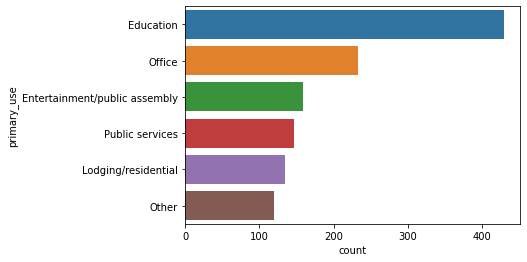

In [ ]:
#Jumlah penggunaan Gedung
p = sns.countplot(y="primary_use", order = df["primary_use"].value_counts().index,data=df)

Jumlah aktivitas penggunaan pada  bangunan terbanyak di bidang“education”. Lalu diikuti “office”, “public assembly”, “public services”, “lodging/residential”, dan terakhir “other”.
Dapat dilihat bahwa jumlah penggunaan terbanyak cenderung terdapat pada fasilitas umum.


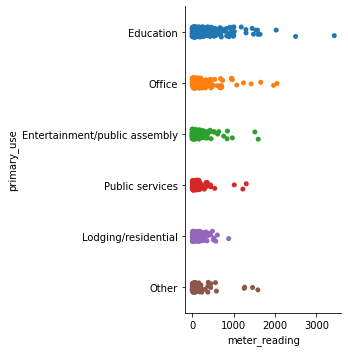

In [ ]:
#Visualisasi Hubungan antara Meter_Reading dan Primary_use
p = sns.catplot(x="meter_reading",y="primary_use",order = df["primary_use"].value_counts().index,data=df)

Rentang jumlah rata-rata  penggunaan  konsumsi energi terbesar terdapat di “education” (sampai dengan sekitar 3000) dan terbesar ke-2 di “office” (sampai dengan sekitar 2500). Jumlah pemakaian paling sedikit di “public services” (dalam rentang sampai dengan sekitar 1500).

In [ ]:
print(df.corr())

                    meter_reading  square_feet  air_temperature  \
meter_reading            1.000000     0.591582         0.022593   
square_feet              0.591582     1.000000        -0.027453   
air_temperature          0.022593    -0.027453         1.000000   
cloud_coverage          -0.010744    -0.106240         0.064075   
dew_temperature          0.071120    -0.054127         0.576816   
precip_depth_1_hr       -0.015354    -0.051341        -0.456023   
sea_level_pressure       0.017077    -0.077068        -0.403092   
wind_direction          -0.043575    -0.067579        -0.714481   
wind_speed              -0.006106    -0.084353        -0.562352   

                    cloud_coverage  dew_temperature  precip_depth_1_hr  \
meter_reading            -0.010744         0.071120          -0.015354   
square_feet              -0.106240        -0.054127          -0.051341   
air_temperature           0.064075         0.576816          -0.456023   
cloud_coverage            1.00000

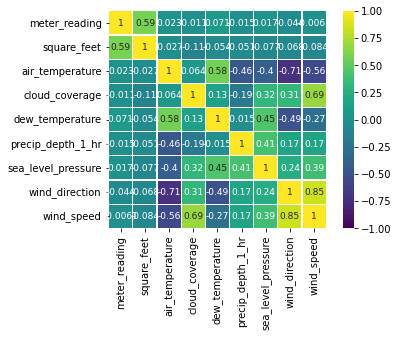

In [ ]:
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 9}, square=True)

**Strengh of relationship**



*   |r| < 0.3  ⇒  None or Very Weak
*   0.3 < |r| < 0.5  ⇒  Weak
*  0.5 < |r| < 0.7  ⇒  Moderate
*   |r| > 0.7  ⇒  Strong



1.   Ada korelasi positif linear sedang antara variabel meter reading dan square feet sebesar r= 0.59
2.   Ada korelasi positif linear sedang antara air temperature dan dew temperature sebesar r=0.58
3. Ada korelasi positif linear sedang korelasi positif linear sedang antara cloud coverage dan wind speed sebesar r= 0.69

4. Ada korelasi positif linear kuat antara wind direction dan wind speed sebesar r= 0.85

5. Ada korelasi negatif linear kuat antara air temperature dan wind direction sebesar r= 0.71



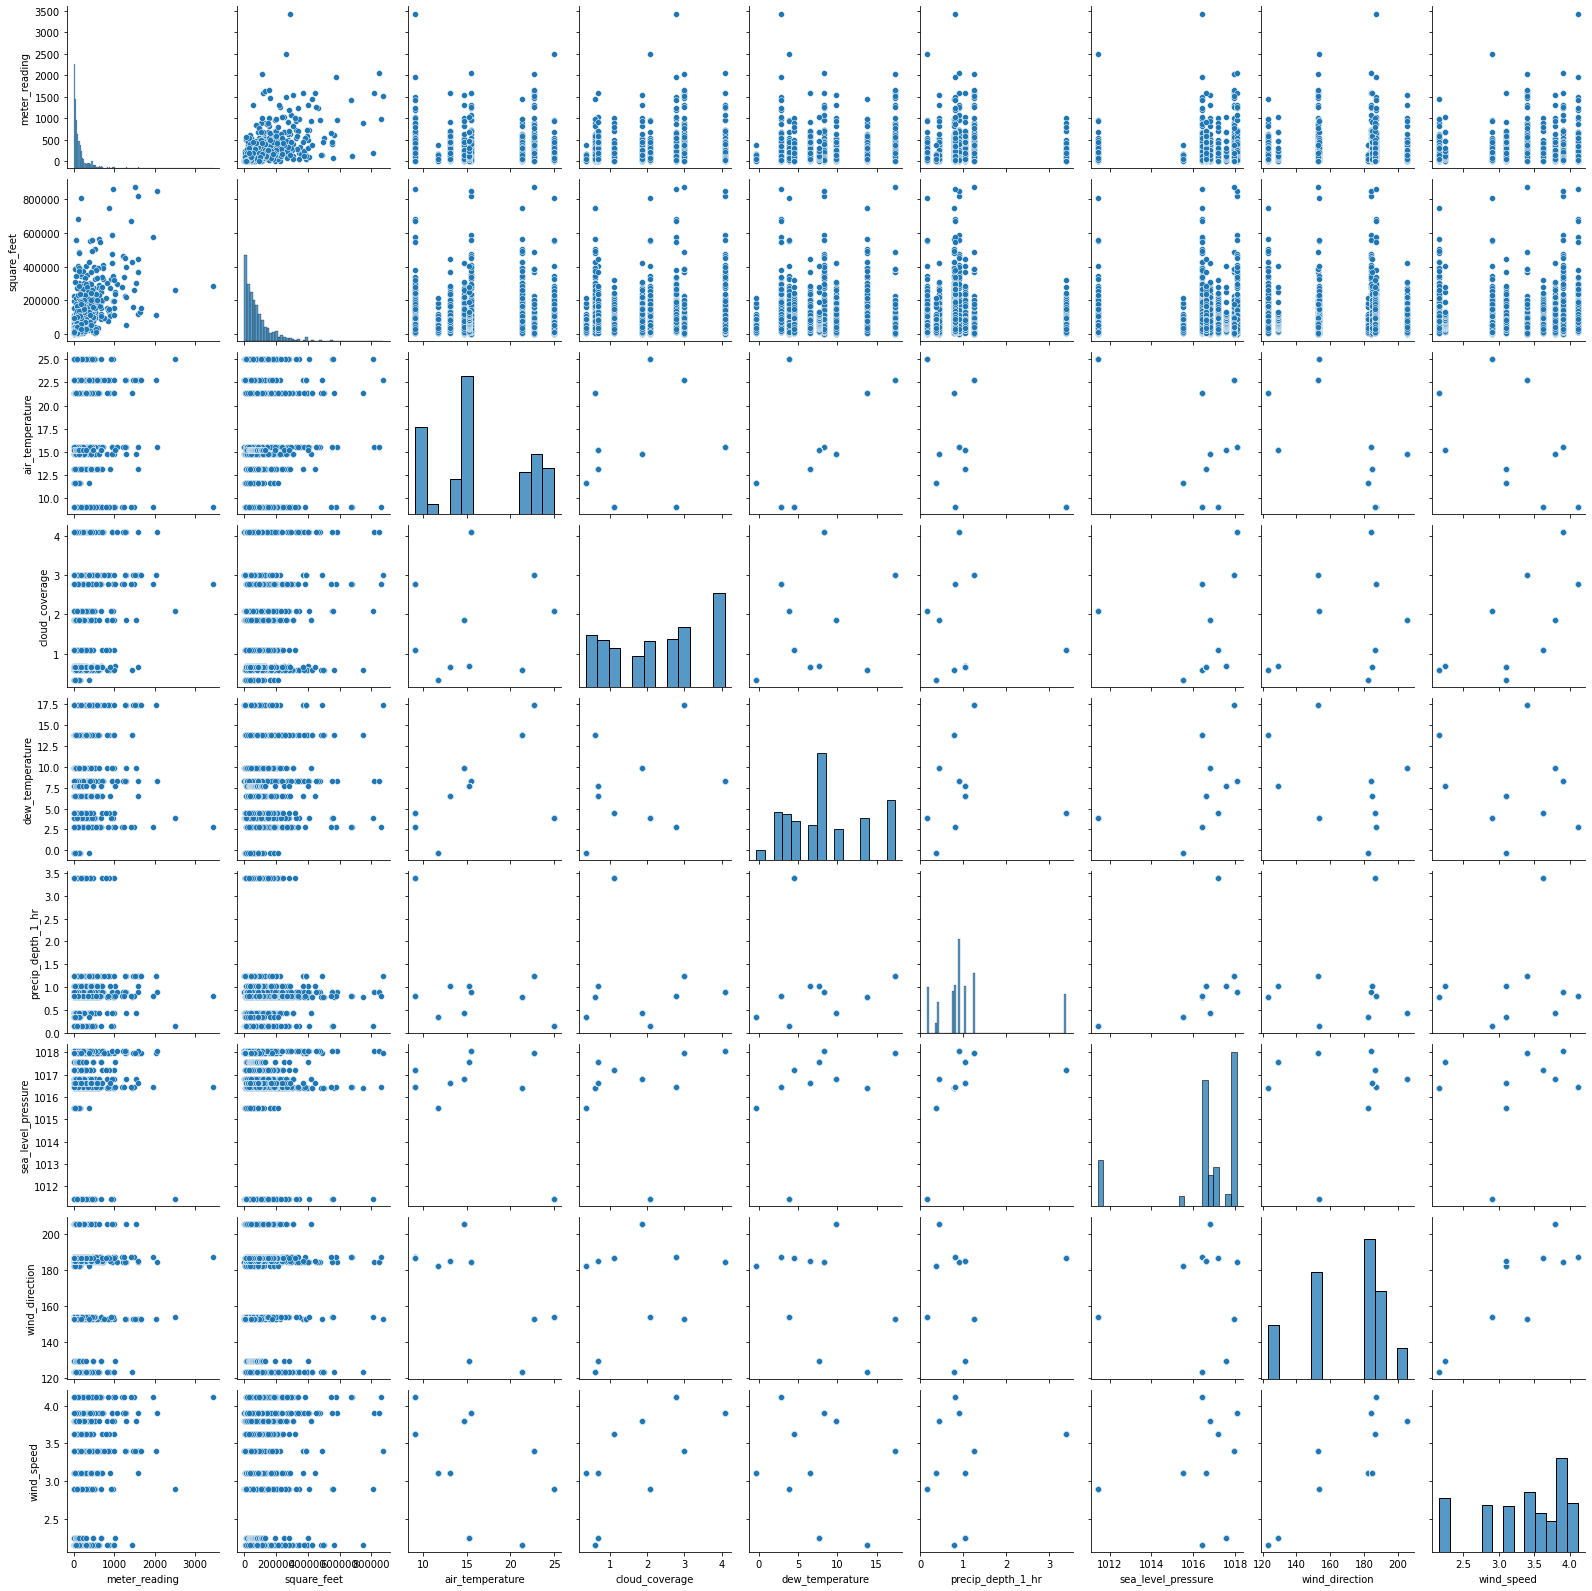

In [ ]:
p = sns.pairplot(df)

# Analisis Regresi

## Standarisasi Data

Sebelum melakukan proses analisis regresi, akan dilakukan terlebih dahulu proses standarisasi terhadap data yang tersedia. Proses standarisasi dilakukan dengan tujuan agar semua variabel mempunyai _impact_ atau dampak yang sama terhadap variabel target ("meter_reading") pada saat dilakukan proses analisis regresi nantinya. Standarisasi yang akan dilakukan adalah RobustScaler dimana algoritma standarisasi ini menggunakan nilai median serta quantile sehingga lebih robust terhadap outliers yang ada pada data.

In [ ]:
scaler = RobustScaler()

df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns)
df_scaled = pd.concat([df_scaled, df[['primary_use']]], axis=1)

df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1220 non-null   float64 
 1   square_feet         1220 non-null   float64 
 2   air_temperature     1220 non-null   float64 
 3   cloud_coverage      1220 non-null   float64 
 4   dew_temperature     1220 non-null   float64 
 5   precip_depth_1_hr   1220 non-null   float64 
 6   sea_level_pressure  1220 non-null   float64 
 7   wind_direction      1220 non-null   float64 
 8   wind_speed          1220 non-null   float64 
 9   primary_use         1220 non-null   category
dtypes: category(1), float64(9)
memory usage: 112.0 KB


## Membuat Model Regresi Awal

In [ ]:
### Model awal regresi

init_model = smf.ols('meter_reading ~ C(primary_use) + square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df_scaled).fit()

print(init_model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     48.02
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.31e-96
Time:                        09:38:59   Log-Likelihood:                -1870.3
No. Observations:                1027   AIC:                             3769.
Df Residuals:                    1013   BIC:                             3838.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Dari hasil di atas, dapat diamati bahwa didapatkan nilai Adj. R-Squared = 0.373. Hal ini berarti bahwa model dapat menjelaskan 37.3% variansi dari data. Maka, dapat disimpulkan bahwa model tersebut tidak terlalu akurat untuk digunakan. 

Selain itu, dapat diamati bahwa seluruh variabel memiliki p-value < 0.05 kecuali dummy variable C(primary_use)[T.Lodging/residential] dan C(primary_use)[T.Office]. Ini berarti kedua dummy variabel tersebut tidak memberikan pengaruh yang signifikan dalam peningkatan pemakaian energi. Akan tetapi, diputuskan untuk tetap mempertahankan kedua dummy variabel tersebut karena seluruh dummy variabel lain pada variabel primary_use memberikan pengaruh yang signifikan dalam peningkatan pemakaian energi. 

Variabel yang berpengaruh dalam peningkatan pemakaian energi: square feet, air temperature, sea level pressure, dan wind speed.

Variabel yang berpengaruh dalam penurunan pemakaian energi: cloud coverage, dew temperature, precip depth 1 hr, dan wind direction.


## Pengujian Asumsi Regresi Linear

In [ ]:
### Uji Normalitas dengan Uji Jarque Bera ###

print(stats.jarque_bera(init_model.resid_pearson))

Jarque_beraResult(statistic=55926.45819256947, pvalue=0.0)


Dari hasil Uji Jarque Bera di atas, didapatkan nilai $p-value=0.00$. $H_0$ dari uji di atas adalah residual dari model berdistribusi normal, sedangkan $H_1$ adalah residual dari model tidak berdistribusi normal. Bila $p-value<alpha=0.05$, maka $H_0$ akan ditolak. Dengan menggunakan $alpha=0.05$ dapat ditarik suatu hasil bahwa nilai $p-value=0.00<alpha=0.05$ maka $H_0$ akan ditolak. Kesimpulan yang dapat diambil adalah residual dari model tidak berdistribusi normal.

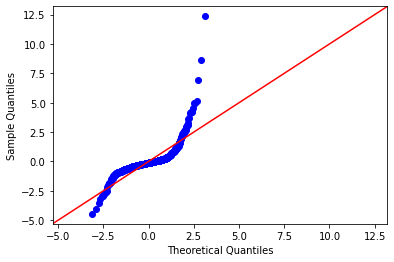

In [ ]:
### Pengecekan Normalitas dengan QQ Plot ###

ax = sm.qqplot(init_model.resid_pearson, line='45')

plt.show()

Dari hasil QQ Plot di atas dapat dilihat bahwa residual dari model tidak berdistribusi mengikuti garis merah yang ada. Hal ini menjadi penguat argumen Uji normalitas di atas bahwa residual dari model tidak berdistribusi normal.

In [ ]:
### Pengecekan Asumsi Homoskedastisitas dengan Uji White ###

white_test = het_white(init_model.resid_pearson, init_model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': 135.05303741732433, 'Test Statistic p-value': 3.6072774598160573e-07, 'F-Statistic': 2.3144673730392915, 'F-Test p-value': 8.871682546364539e-08}


Dari hasil Uji White di atas, didapatkan nilai $p-value=0.00$. $H_0$ dari uji di atas adalah residual dari model homoskedastis, sedangkan $H_1$ adalah residual dari model heteroskedastis. Bila $p-value<alpha=0.05$, maka $H_0$ akan ditolak. Dengan menggunakan $alpha=0.05$ dapat ditarik suatu hasil bahwa nilai $p-value=3.6072774598160573e-07<alpha=0.05$ maka $H_0$ akan ditolak. Kesimpulan yang dapat diambil adalah residual dari model heteroskedastis.

In [ ]:
### Pengecekan Asumsi Autokorelasi dengan Uji Durbin Watson ###

print('Durbin watson test stat: ', durbin_watson(init_model.resid_pearson))

Durbin watson test stat:  1.822100601149663


Dari hasil Uji Durbin Watson di atas, bila statistik uji berada dalam range 1.5 hingga 2.5 maka itu berarti residual dari model independen terhadap satu dengan lainnya. Didapatkan dari model di atas nilai statistik uji durbin watson = 1.822 yang masih berada dalam range 1.5 hingga 2.5. Hal ini menandakan bahwa residual dari model saling independen satu dengan lainnya.

Karena hanya asumsi independensi residual yang terpenuhi, maka solusi yang akan coba dilakukan adalah dengan membuat model baru tanpa menggunakan influential observation.

## Model Regresi Tanpa Influential Observation

In [ ]:
### Mengidentifikasi Influential Observation yang Memiliki Cooks Distance <= threshold ###

influence = init_model.get_influence()
influence_df = influence.summary_frame()

threshold = 4 / (init_model.nobs - (len(init_model.params) -1) -1)

filtered_influence = influence_df[influence_df['cooks_d']<=threshold]
filtered_influence

,dfb_Intercept,dfb_C(primary_use)[T.Entertainment/public assembly],dfb_C(primary_use)[T.Lodging/residential],dfb_C(primary_use)[T.Office],dfb_C(primary_use)[T.Other],dfb_C(primary_use)[T.Public services],dfb_square_feet,dfb_air_temperature,dfb_cloud_coverage,dfb_dew_temperature,dfb_precip_depth_1_hr,dfb_sea_level_pressure,dfb_wind_direction,dfb_wind_speed,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.005191,-0.001826,-0.002912,-0.002515,-0.002347,-0.001684,-0.001480,0.003058,-0.003607,-0.001796,-0.000575,0.002534,-0.003574,0.004020,0.000005,0.078299,0.010584,0.008098,0.078261,0.008094
1,-0.026258,0.009205,0.014730,0.012699,0.011806,0.008494,0.008020,-0.015381,0.018190,0.009008,0.002935,-0.012735,0.018075,-0.020289,0.000120,-0.395667,0.010637,-0.041026,-0.395502,-0.041009
2,-0.054166,0.019024,0.030384,0.026222,0.024431,0.017550,0.015925,-0.031832,0.037589,0.018672,0.006025,-0.026367,0.037287,-0.041908,0.000510,-0.816416,0.010607,-0.084531,-0.816281,-0.084517
3,0.038584,-0.013726,-0.021633,-0.018808,-0.017782,-0.012637,-0.008295,0.023187,-0.027102,-0.013745,-0.004153,0.019260,-0.026570,0.030126,0.000256,0.583688,0.010430,0.059924,0.583498,0.059904
5,-0.053811,0.018935,0.030183,0.026076,0.024347,0.017462,0.015213,-0.031726,0.037408,0.018639,0.005958,-0.026290,0.037045,-0.041688,0.000503,-0.811483,0.010578,-0.083905,-0.811346,-0.083891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-0.000570,0.000547,-0.000070,-0.003138,0.011224,0.000606,-0.003984,-0.001546,0.001398,0.001293,0.009109,-0.002083,0.001433,-0.001426,0.000026,0.145374,0.017137,0.019196,0.145304,0.019187
1216,0.000107,-0.000590,0.000203,-0.007435,0.001542,-0.000681,0.004344,0.000709,-0.000651,-0.000537,-0.010720,0.001380,-0.000966,0.000753,0.000031,-0.198291,0.010997,-0.020909,-0.198197,-0.020899
1217,-0.000766,0.000776,-0.000109,-0.004325,0.015558,0.000852,-0.005992,-0.002204,0.001968,0.001849,0.012562,-0.002943,0.001967,-0.001998,0.000051,0.200848,0.017274,0.026628,0.200753,0.026616
1218,-0.000730,0.003715,-0.002982,-0.019832,-0.009252,0.056481,-0.011101,-0.003617,-0.000482,0.004396,0.052971,-0.008603,-0.002851,0.001780,0.000665,0.705767,0.018337,0.096458,0.705592,0.096434


In [ ]:
### Membuat Model Baru Tanpa Influential Observation ###

ex_inf_mod = smf.ols('meter_reading ~ C(primary_use) + square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df_scaled.loc[filtered_influence.index, :]).fit()

print(ex_inf_mod.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     79.50
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          3.51e-142
Time:                        09:39:02   Log-Likelihood:                -1056.4
No. Observations:                 971   AIC:                             2141.
Df Residuals:                     957   BIC:                             2209.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Dari hasil di atas dapat terlihat bahwa setiap dummy yang terdapat pada variabel "primary_use" mempunyai $p-value>alpha=0.05$. Hal tersebut dapat menjadi indikasi bahwa variabel "primary_use" tidak mempunyai dampak yang signifikan terhadap variabel "meter_reading". Sehingga diputuskan bahwa variabel "primary_use" akan dibuang.

## Pengujian Asumsi Regresi Linear Model Tanpa Influential Observation

In [ ]:
### Uji Normalitas dengan Uji Jarque Bera ###

print(stats.jarque_bera(ex_inf_mod.resid_pearson))

Jarque_beraResult(statistic=1280.3437195123945, pvalue=0.0)


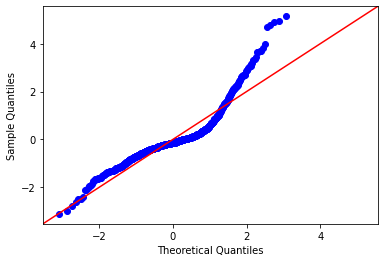

In [ ]:
### Pengecekan Normalitas dengan QQ Plot ###

ax = sm.qqplot(ex_inf_mod.resid_pearson, line='45')

plt.show()

In [ ]:
### Pengecekan Asumsi Homoskedastisitas dengan Uji White ###

white_test = het_white(ex_inf_mod.resid_pearson, ex_inf_mod.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': 193.6644418117775, 'Test Statistic p-value': 3.2638871280586034e-15, 'F-Statistic': 3.5868076855204065, 'F-Test p-value': 1.8797678282432457e-17}


In [ ]:
### Pengecekan Asumsi Autokorelasi dengan Uji Durbin Watson ###

print('Durbin watson test stat: ', durbin_watson(ex_inf_mod.resid_pearson))

Durbin watson test stat:  1.7015260515596746


Dari hasil pengujian asumsi di atas dapat terlihat bahwa setelah dilakukan pembuangan influential observation, tetap hanya asumsi independensi residual yang terpenuhi dari model. Namun dari QQ Plot model tanpa influential observation dapat terlihat bahwa residual dari model mempunyai distribusi yang lebih mendekati garis merah dibandingkan dengan QQ Plot model tanpa membuang influential observation.

## Perbandingan Model Tanpa Membuang Influential Observation dengan Model yang Membuang Influential Obervation

Berikut adalah beberapa hasil evaluasi yang bisa didapatkan dari kedua model yang telah dibuat:

1.   Nilai adj. R squared dan R squared dari model dengan influential observation (0.38 & 0.31) jauh lebih kecil dibandingkan dengan model tanpa influential observation (0.51 & 0.5). Sehingga hal ini dapat diartikan bahwa model tanpa influential observation mempunyai akurasi memprediksi variabel target ("meter_reading") yang lebih baik.
2.   Nilai AIC dan BIC dari model dengan influential observation (3769 & 3838) jauh lebih besar dibandingkan dengan model tanpa influential observation (2147 & 2186). Sehingga hal ini dapat diartikan bahwa model tanpa influential observation lebih baik dari sisi AIC dan BIC.
3.   Hanya asumsi independensi residual yang terpenuhi dari kedua model yang ada. Namun model tanpa influential observation mempunyai distribusi residual yang cenderung lebih mendekati distribusi normal dibandingkan dengan model tanpa membuang influential observation. Hal ini dapat terlihat juga dari nilai skewness model tanpa influential yang lebih mendekati nol (1.5 berbanding 3.8) dan nilai kurtosis model tanpa influential yang lebih mendekati 3 (7.9 berbanding 38.3).

Sehingga berdasarkan hasil penjelasan di atas, model yang akan digunakan adalah model tanpa influential observation. Namun ada catatan yang harus diperhatikan dari model tersebut. Model tersebut membuang observasi yang terindikasi sebagai influential observation dari model maka bisa saja beberapa informasi yang terdapat pada data juga ikut terbuang. Model tersebut bisa jadi hanya cocok untuk kriteria serta demografi data yang sesuai dengan data yang digunakan pada model saja dan belum tentu cocok untuk digunakan memprediksi data lain.



In [ ]:
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     48.02
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           3.31e-96
Time:                        09:39:02   Log-Likelihood:                -1870.3
No. Observations:                1027   AIC:                             3769.
Df Residuals:                    1013   BIC:                             3838.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.8000      0.117      6.860      0.000       0.571       1.029
C(primary_use)[T.Entertainment/public assembly]    -0.3490      0.154     -2.272      0.023      -0.650      -0.048
C(primary_use)[T.Lodging/residential]              -0.2624      0.175     -1.501      0.134      -0.605       0.081
C(primary_use)[T.Office]                            0.1168      0.142      0.824      0.410      -0.161       0.395
C(primary_use)[T.Other]                            -0.5345      0.172     -3.112      0.002      -0.871      -0.198
C(primary_use)[T.Public services]                  -0.3315      0.155     -2.142      0.032      -0.635      -0.028
square_feet                                         0.9484      0.041     23.367      0.000       0.869       1.028
air_temperature                                     2.7551      0.689      4.001      0.000       1.404       4.107
cloud_coverage                                     -1.9155      0.411     -4.658      0.000      -2.722      -1.109
dew_temperature                                    -0.8878      0.353     -2.515      0.012      -1.581      -0.195
precip_depth_1_hr                                  -0.0420      0.021     -2.018      0.044      -0.083      -0.001
sea_level_pressure                                  0.7945      0.230      3.454      0.001       0.343       1.246
wind_direction                                     -1.0596      0.250     -4.232      0.000      -1.551      -0.568
wind_speed                                          2.5379      0.476      5.332      0.000       1.604       3.472
==============================================================================
Omnibus:                      918.065   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55926.458
Skew:                           3.800   Prob(JB):                         0.00
Kurtosis:                      38.344   Cond. No.                         74.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Kesimpulan

- Pada data perusahaan masih terdapat beberapa missing values, dapat dipertimbangkan untuk menghindari munculnya missing value pada data, ada baiknya untuk memastikan instrumen pengukuran baik terlebih dahulu sebelum mengambil data.

- Berdasarkan jumlah gedung dalam data, didapatkan bahwa  jumlah aktivitas penggunaan bangunan  cenderung terdapat pada fasilitas umum, khususnya pada sekolah (“education”), “office”, “public assembly”, “public services”

- Rentang jumlah rata-rata  penggunaan  konsumsi energi terbesar terdapat di “education” (sampai dengan sekitar 3000) dan terbesar ke-2 di “office” (sampai dengan sekitar 2500). Jumlah pemakaian paling sedikit di “public services” (dalam rentang sampai dengan sekitar 1500).

- Hanya variabel square_feet/luas bangunan  yang berkorelasi cukup kuat dengan meter_reading/rata-rata konsumsi penggunaan energi. 
Rekomendasi: dapat dipertimbangkan penambahan variabel lain yang sekiranya berhubungan dengan meter_reading agar bisa mendapatkan insight yang lebih beragam (misalkan variabel/data jenis meteran bangunan, yang terdiri dari listrik, air dingin, uap, air panas dst.).

- Variabel yang mempengaruhi peningkatan pemakaian energi berdasarkan model tanpa influential:  square feet, wind speed, air temperature, sea level pressure.

# Rekomendasi

Dari hasil model yang didapatkan, maka dapat disimpulkan bahwa variabel square_feet, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, dan wind_speed memberikan pengaruh yang signifikan terhadap pemakaian energi listrik. Selanjutnya, untuk variabel primary_use atau jenis gedung, walaupun hasil menunjukkan bahwa variabel tersebut tidak berpengaruh signifikan terhadap pemakaian energi, variabel tetap akan digunakan pada model karena ingin dilihat jenis gedung mana yang menggunakan konsumsi energi paling sedikit. 

Sesuai dengan tujuan ASHRAE, yaitu mendatangkan lebih banyak investor dan institusi finansial untuk berinvestasi pada ranah penghematan energi agar peningkatan efisiensi bangunan dapat dilakukan, maka dapat diberikan saran berupa perlu dilakukannya strategi marketing dengan target utama adalah pihak-pihak yang bergerak di bidang “education” dan “office”. Dengan melakukan penawaran produk ataupun jasa guna melakukan efisiensi energi pada bangunan-bangunan tersebut.

Dari output, didapatkan:
- nilai koefisien square_feet yaitu 0.841, ini menunjukkan bahwa semakin luas suatu bangunan, maka konsumsi energi akan semakin meningkat sebesar 0.841 kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan luas bangunan yang semakin kecil.
- nilai koefisien air_temperature yaitu 2.1849, ini menunjukkan bahwa semakin meningkat suhu di suatu bangunan, maka konsumsi energi akan semakin meningkat sebesar 2.1849 kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan suhu pada bangunan yang semakin rendah.
- nilai koefisien cloud_coverage  yaitu -1.3900, ini menunjukkan bahwa semakin menurun penutupan langit oleh awan pada suatu bangunan, maka konsumsi energi akan semakin menurun sebesar 1.3900 kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan penutupan langit oleh awan di suatu bangunan yang semakin rendah.
- Nilai koefisien dew_temperature yaitu -0.6865, ini menunjukkan bahwa semakin menurun suhu embun pada suatu bangunan, maka konsumsi energi akan semakin menurun sebesar 0.6865  kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan suhu embun di suatu bangunan yang semakin rendah.
- Nilai koefisien precip_depth_1_hr yaitu -0.0221, ini menunjukkan bahwa semakin menurun ketebalan presipitasi hujan pada suatu bangunan, maka konsumsi energi akan semakin menurun sebesar 0.0221  kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan ketebalan presipitasi hujan di suatu bangunan yang semakin rendah.
- Nilai koefisien sea_level_pressure, yaitu 0.6191, ini menunjukkan bahwa semakin meningkatnya tekanan air laut pada suatu bangunan, maka konsumsi energi akan semakin meningkat sebesar 0.6191  kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan ketebalan presipitasi hujan di suatu bangunan yang semakin tinggi.
- Nilai koefisien wind_direction, yaitu -0.72, ini menunjukkan bahwa semakin menurunnya arah angin pada suatu bangunan, maka konsumsi energi akan semakin menurun sebesar 0.72 kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan arah angin di suatu bangunan yang semakin rendah.
- Nilai koefisien wind_speed, yaitu 1.7887,, ini menunjukkan bahwa semakin meningkatkan kecepatan angin pada suatu bangunan, maka konsumsi energi akan semakin meningkat sebesar 1.7887  kWh. Maka, untuk mendapatkan konsumsi energi yang seminimal mungkin, diperlukan kecepatan angin di suatu bangunan yang semakin tinggi.
- Jenis gedung yang memiliki pemakaian energi paling minimal adalah jenis gedung “lainnya”.


